In [38]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
#MLPRegressor 代表 Multi-Layer Perceptron Regressor。而 MultiLayer Perceptron 便是像圖 1 的多層神經元（感知器 perceptrons）的架構
#Regressor 代表其輸出/輸入的關係同於迴歸模型的概念(輸出與輸入皆是連續型資料)
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

In [144]:
# Preaper training data (input)
l1, l2 = 20, 10
t = np.linspace(0,np.pi/2,20)
l = np.arange(l1 - l2 + 1, l1 + l2 + 1, 2)
X = l.reshape(-1,1) @ np.cos(t.reshape(1,-1))
Y = l.reshape(-1,1) @ np.sin(t.reshape(1,-1))

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)


Root Mean square error is 0.0635


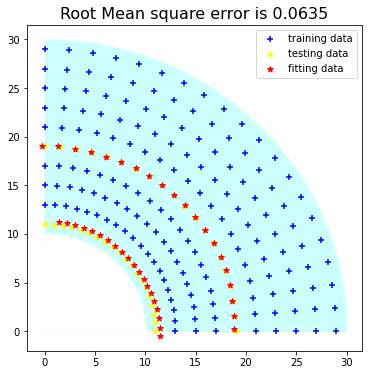

In [145]:
#扇型範圍
plt.figure(figsize=(6,6))
f1=lambda x:np.sqrt((l1+l2)**2-x**2)
f2=lambda x:np.sqrt(l2**2-x**2)
x=np.linspace(0,l1+l2,200)
plt.fill_between(x,f1(x),0,color='#CCFFFF')
x = np.linspace(0,l2,100)
plt.fill_between(x,f2(x),0,color='white')

plt.scatter(x_train.ravel(),y_train.ravel(),marker='+',color='blue',label="training data")
# prepare training data (output)
theta2 = np.arccos((x_train.ravel()**2 +y_train.ravel()**2 -l1**2 - l2**2)/(2*l1*l2))
theta1 = np.arctan(y_train.ravel()/x_train.ravel()) - np.arctan(l2*np.sin(theta2)/(l1+l2*np.cos(theta2)))

# setup for ANN training
InputX = np.c_[x_train.ravel(),y_train.ravel()]
OutputY = np.c_[theta1, theta2]

hidden_layers = (20,10 )
solver = 'lbfgs' # the best for robot data
# solver = 'sgd'
# solver = 'adam'
mlp_reg = MLPRegressor(max_iter = 8000, solver = solver,hidden_layer_sizes = hidden_layers, verbose = False ,activation = 'logistic',  tol=1e-6, random_state = 0)
# default activation = 'relu'
#max_iter = 8000 代表最多的迴圈數，即使尚未達收斂條件，也強制停止 , tol=1e-6 代表當目標函數（或損失函數 Loss function）隨著遞迴不再明顯改變
#（變化量小於 tol），則停止繼續遞迴，表示估計值差不多不再改變了
mlp_reg.fit(InputX, OutputY) # Training ...

Input_testX = np.c_[x_test.ravel(),y_test.ravel()]
theta2 = np.arccos((x_test.ravel()**2 +y_test.ravel()**2 -l1**2 - l2**2)/(2*l1*l2))
theta1 = np.arctan(y_test.ravel()/x_test.ravel()) - np.arctan(l2*np.sin(theta2)/(l1+l2*np.cos(theta2)))
Output_testY = np.c_[theta1, theta2]
plt.scatter(x_test.ravel(),y_test.ravel(),marker='*',color='yellow',label="testing data")


OutputY_hat = mlp_reg.predict(Input_testX) # Calculate fitted values
theta1_hat, theta2_hat = OutputY_hat[:,0], OutputY_hat[:,1]
# convert to (x,y) positions
x_hat = l1 * np.cos(theta1_hat) + l2 * np.cos(theta1_hat+theta2_hat)
y_hat = l1 * np.sin(theta1_hat) + l2 * np.sin(theta1_hat+theta2_hat)
plt.scatter(x_hat.ravel(),y_hat.ravel(),marker='*',color='red',label="fitting data")

rmse = np.sqrt(mean_squared_error(Output_testY, OutputY_hat))
print('Root Mean square error is {:.4f}'.format(rmse))
plt.title("Root Mean square error is {:.4f}".format(rmse),fontsize='16')
plt.legend()
plt.show()


In [147]:
import numpy as np
from scipy.special import gammainc
from scipy.stats import uniform
import matplotlib.pyplot as plt

#均勻訓練與測試資料的生成
radius_in, radius_out =10, 30

"""
#-----------------法一-用正方形切割--------------------------
N=1000
X = uniform.rvs(loc = 0, scale = radius_out, size=(N, 2))
d = np.sqrt(X[:, 0] ** 2 + X[:, 1] ** 2)
Idx = (d < radius_out) & (d > radius_in)
TrainData = X[(d < radius_out) & (d > radius_in), :]
"""

#------------------法二-用圓形切割--------------------
#圓形
def randsphere(center, radius, n_per_sphere):
    r = radius
    ndim = center.size
    x = np.random.normal(size=(n_per_sphere, ndim))
    ssq = np.sum(x ** 2, axis=1)
    fr = r * gammainc(ndim / 2, ssq / 2) ** (1 / ndim)\
    / np.sqrt(ssq)
    frtiled = np.tile(fr.reshape(n_per_sphere, 1), (1, ndim))
    p = center + np.multiply(x, frtiled)
    return p
p = randsphere(np.array([0, 0]), 30, 3000)

#扇形
p = p[(p[:,0] > 0) & (p[:,1] > 0), :] # 第一象限
d = np.sum(p**2, axis=1)
p = p[d >= radius_in**2, :] 

#------------------------------------------------------

X,Y=p[:,0],p[:,1]
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)


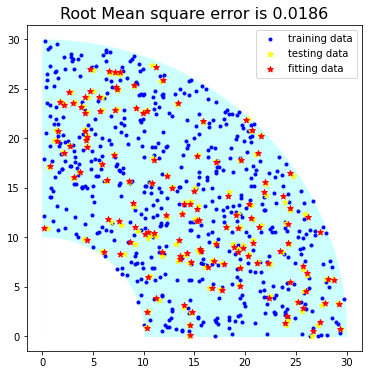

In [151]:
l1, l2 = 20, 10
#扇型範圍
plt.figure(figsize=(6,6))
f1=lambda x:np.sqrt((l1+l2)**2-x**2)
f2=lambda x:np.sqrt(l2**2-x**2)
x=np.linspace(0,l1+l2,200)
plt.fill_between(x,f1(x),0,color='#CCFFFF')
x = np.linspace(0,l2,100)
plt.fill_between(x,f2(x),0,color='white')

plt.scatter(x_train,y_train,marker='.',color='blue',label="training data")

theta2 = np.arccos((x_train**2 + y_train**2 -l1**2 - l2**2)/(2*l1*l2))
theta1 = np.arctan(y_train/x_train) - np.arctan(l2*np.sin(theta2)/(l1+l2*np.cos(theta2)))

InputX = np.c_[x_train, y_train]
OutputY = np.c_[theta1, theta2]

hidden_layers = (20,10 )
solver = 'lbfgs' # the best for robot data
mlp_reg = MLPRegressor(max_iter = 8000, solver = solver,hidden_layer_sizes = hidden_layers, verbose = False
,activation = 'logistic', # default activation = 'relu' 
tol=1e-6, random_state = 0)

mlp_reg.fit(InputX, OutputY) # Training ...

theta2 = np.arccos((x_test**2 + y_test**2 -l1**2 - l2**2)/(2*l1*l2))
theta1 = np.arctan(y_test/x_test) - np.arctan(l2*np.sin(theta2)/(l1+l2*np.cos(theta2)))
Input_testX = np.c_[x_test, y_test]
Output_testY = np.c_[theta1, theta2]
plt.scatter(x_test,y_test,marker='*',color='yellow',label="testing data")

OutputY_hat = mlp_reg.predict(Input_testX) # Calculate fitted values
theta1_hat, theta2_hat = OutputY_hat[:,0], OutputY_hat[:,1]

x_hat = l1 * np.cos(theta1_hat) + l2 * np.cos(theta1_hat+theta2_hat)
y_hat = l1 * np.sin(theta1_hat) + l2 * np.sin(theta1_hat+theta2_hat)
plt.scatter(x_hat,y_hat,marker='*',color='red',label="fitting data")
rmse = np.sqrt(mean_squared_error(Output_testY, OutputY_hat))
plt.title("Root Mean square error is {:.4f}".format(rmse),fontsize='16')
plt.legend()
plt.show()

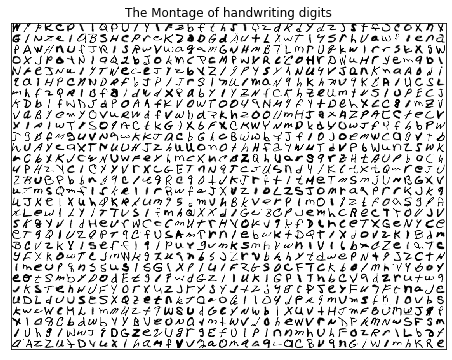

In [218]:
from scipy.io import loadmat
#from sklearn.datasets import fetch_openml
data_dir = 'G:\\碩班\\統計與數學應用\\W15data\\'
D = loadmat(data_dir + 'Letters_train.mat') #Digits_train_10000
#D.keys()
#X,y=fetch_openml('mnist_784',return_X_y=True)
X = D['X'] # images
y = D['y'] # labels: single outpu
plt.figure(figsize = (9,6))

# prepare and diaplay a montage of digit images
n, m = 30, 40 # A n x m montage (total mn images)
sz = np.sqrt(X.shape[1]).astype('int') # image size sz x sz
M = np.zeros((m*sz, n*sz)) # montage image
A = X[:m*n,:] # show the first nm images

# Arrange images to form a montage
for i in range(m) :
    for j in range(n) :
        M[i*sz: (i+1)*sz, j*sz:(j+1)*sz] =A[i*n+j,:].reshape(sz, sz)


plt.imshow(M.T, cmap = plt.cm.gray_r,interpolation = 'nearest')
plt.xticks([])
plt.yticks([])
plt.title('The Montage of handwriting digits')
plt.show()


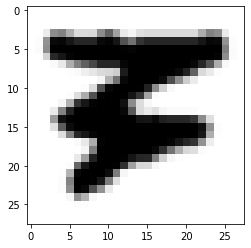

In [242]:
Img=np.array(X)[0,:].reshape(sz,sz)
plt.imshow(Img,cmap=plt.cm.gray_r)
plt.show()

In [268]:
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
# prepare data
N=500
X_=np.array(X)[:N,:]
y_=np.array(y)[:N,:]
X_train, X_test, y_train, y_test = \
train_test_split(X_/255, y_, test_size = 0.25)
# setup and run


In [273]:

hidden_layers = (80) # one hidden layer

# solver = ’sgd’ # not efficient, need more tuning
# solver = ’lbfgs’ # not suitable here
solver = 'adam' # default solver
clf = MLPClassifier(max_iter = 10000, solver = solver,
hidden_layer_sizes = hidden_layers, verbose = False,
activation = 'logistic', tol = 1e-6, random_state = 0)
# default activation = ’relu’
clf.fit(X_train, y_train)
y_test_hat = clf.predict(X_test)

C:\Users\user\AppData\Roaming\Python\Python38\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1118: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


labels=[]
for i in range(97,123):
    labels.append(chr(i))
labels

C:\Users\user\AppData\Roaming\Python\Python38\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


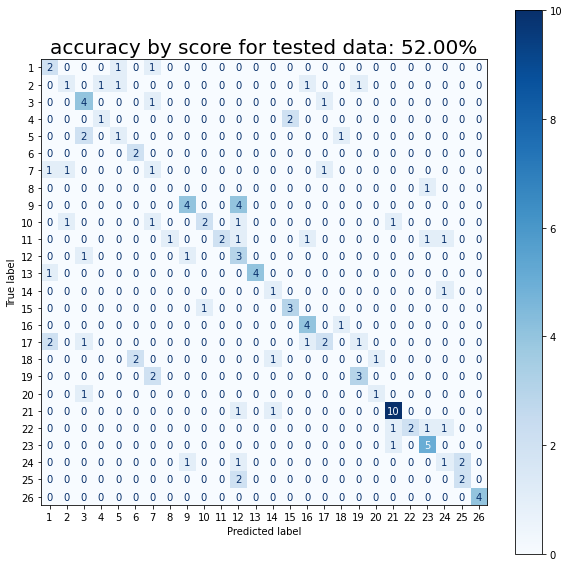

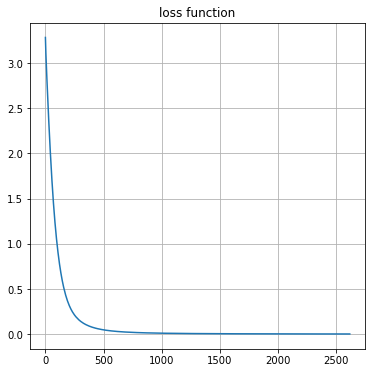

In [274]:

from sklearn.metrics import plot_confusion_matrix
#print("accuracy by score for tested data: {:.2f}%".format(100*clf.score(X_test, y_test)))
# Confusion matrix
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(clf, X_test, y_test,
cmap = plt.cm.Blues,ax=ax)
plt.title("accuracy by score for tested data: {:.2f}%".format(100*clf.score(X_test, y_test)),fontsize='20')
plt.show()


plt.figure(figsize=(6,6))
plt.title("loss function")
plt.plot(clf.loss_curve_)
plt.grid(True)
plt.show()

clf.loss_ # The current value of loss function
clf.best_loss_
clf.n_layers_ # input layer is counted
clf.n_outputs_ # Number of outputs
clf.out_activation_ # softmax is employed here
clf.n_iter_ # The total number of iterations
clf.t_ # The number of training samples
clf.classes_ # Class labels for each output.
clf.get_params(deep=True) # get all para

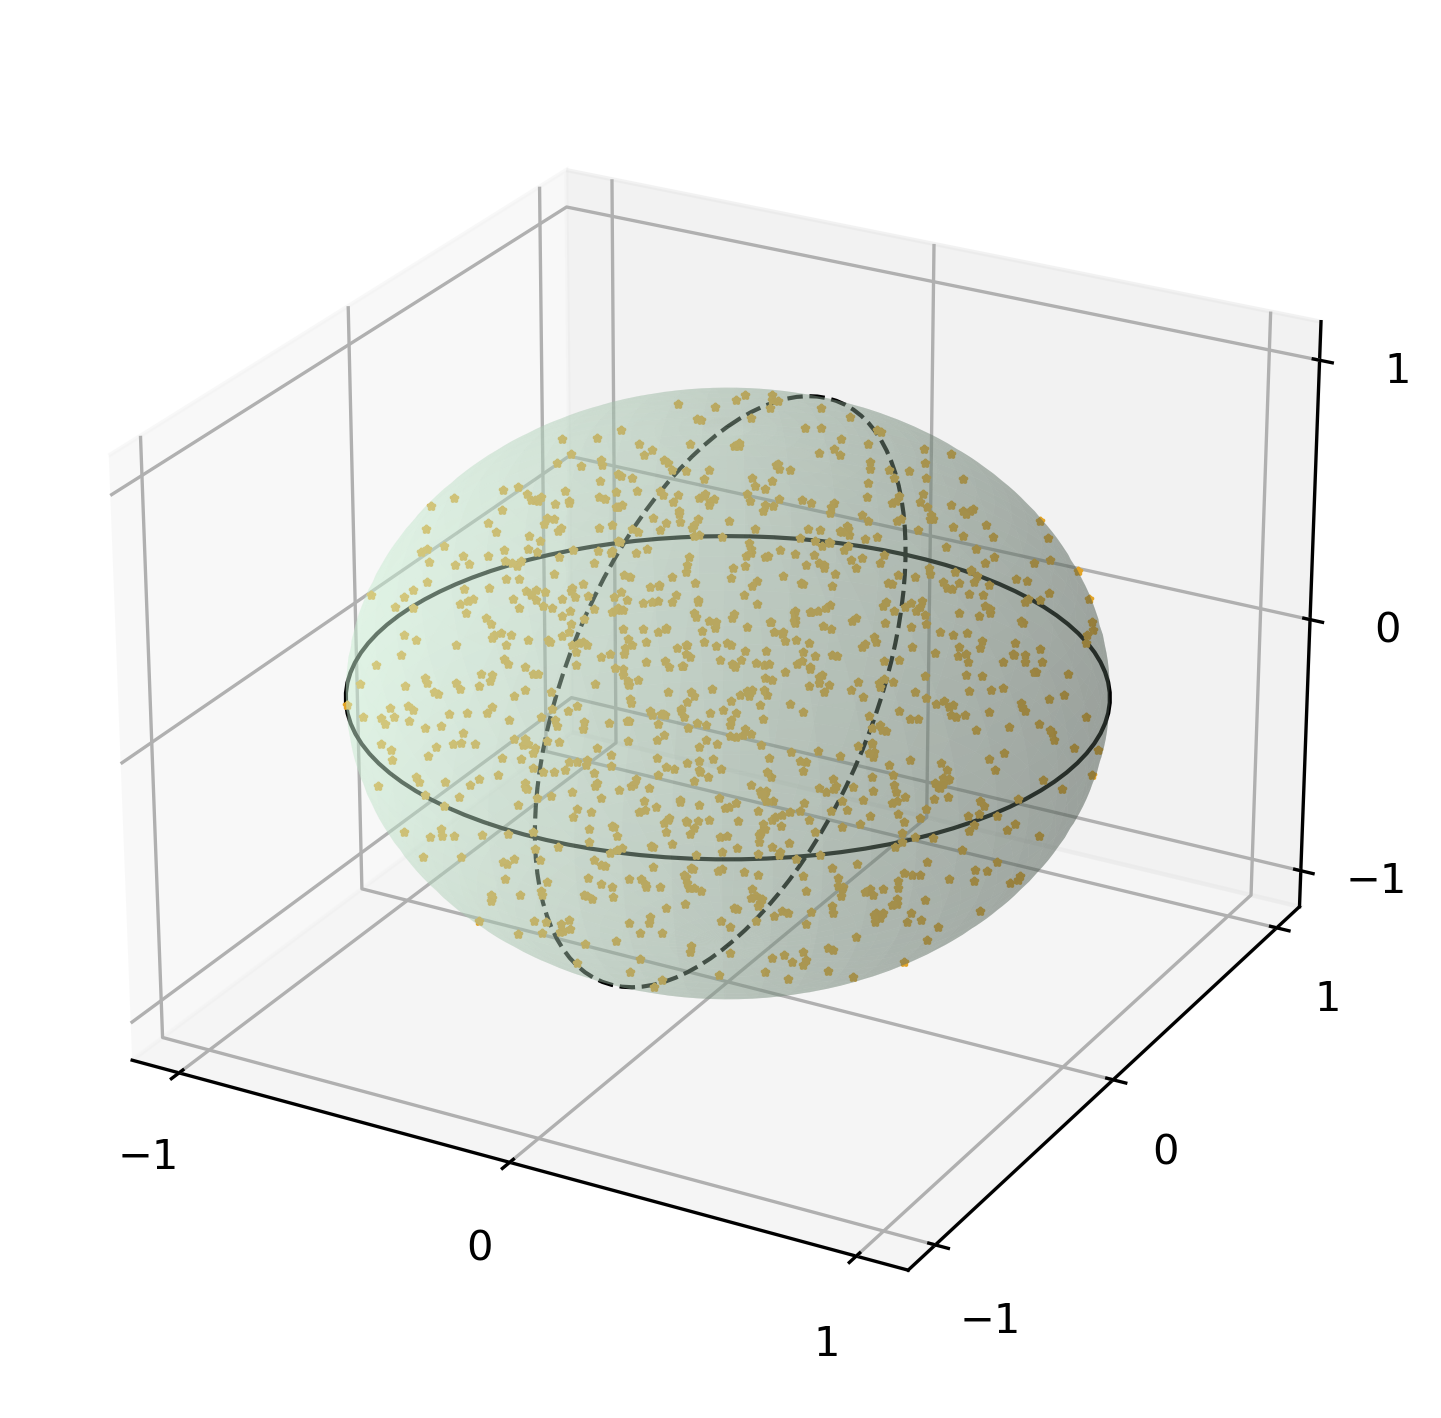

In [152]:
center = np.array([0, 0, 0])
radius = 1
n=1000 
fig = plt.figure(figsize=(6,6), dpi=300)
ax = fig.add_subplot(projection='3d')
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = radius * np.outer(np.cos(u), np.sin(v))
y = radius * np.outer(np.sin(u), np.sin(v))
z = radius * np.outer(np.ones(np.size(u)), np.cos(v))
# Plot the surface
ax.plot_surface(x, y, z, color = '#CFF5D9', alpha = 0.3)
ax.plot(np.sin(u), np.cos(u), 0, color='k', linewidth = 1)
ax.plot([0]*100,np.sin(u),np.cos(u), color='k', \
linewidth = 1, linestyle = 'dashed')
P = randsphere(center, radius, n)
for i in range(n):
    ax.scatter(P[i, 0], P[i, 1], P[i, 2], marker = '*',c = '#E2A428', s = 2)
ax.view_init(elev = 25, azim = -61)
ax.set_xticks([-1, 0, 1])
ax.set_yticks([-1, 0, 1])
ax.set_zticks([-1, 0, 1])
plt.show()
